In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt

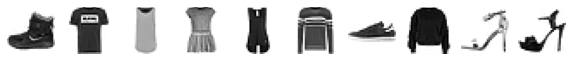

In [5]:
flg, axs = plt.subplots(1,10,figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [8]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [9]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [10]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state =42)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [39]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [40]:
model = keras.Sequential(dense)

In [41]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [58]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4054 - accuracy: 0.8701
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4052 - accuracy: 0.8710
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4055 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4056 - accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4056 - accuracy: 0.8712


In [59]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8543


[0.4756869971752167, 0.8542500138282776]

In [60]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [61]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [62]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state =42)

In [65]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [66]:
model = keras.Sequential([dense1, dense2])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
model = keras.Sequential([
  keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'),
  keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 mnist 모델')

In [71]:
model.summary()

Model: "패션 mnist 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


hidden => 인풋 784*100 + bias 100개

In [74]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden2'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5669 - accuracy: 0.8081
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4082 - accuracy: 0.8532
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8663
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3512 - accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3331 - accuracy: 0.8792


In [79]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5319 - accuracy: 0.8123
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3957 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3566 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3219 - accuracy: 0.8842


In [82]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3881 - accuracy: 0.8666


[0.3881414830684662, 0.8665833473205566]